# Data Analysis
## Client
Erin Robinson: Buyer	
- Invest in poor neighborhood
- buying & selling 
- costs back + little profit
- socially responsible

Erin wants to buy property in poor neighbourhoods to create, renovate and maintain affordable living space for rent and selling. Since she is responsible, renovating outdated property is possible. With Erins private resources, houses shall be bought, possibly renovated and the new property shall be transfered into a community oriented fund.

## Questions:
1. What parameters describe a poor neighbourhood based on the house data?
2. Where are those poor neighbourhoods located
3. In which of those neighbourhoods is the renovated fraction especially small and houses are reletively old and condition or grade is rather bad -> These are the neighborhoods in most need of development 

### Question 1. : What parameters describe a poor neighbourhood based on the house data?
#### Assumptions:
- A poor neighborhood is characterized by a comperatively low price / m^2 and low absolute housing prices
- Lot and living areas are small
- Housing is in a bad condition and has a bad grade

#### Further Information: Poverty rate

The poverty rate is the ratio of the number of people (in a given age group) whose income falls below the poverty line; taken as half the median household income of the total population.
The povery rate among all age groups in the US is 0.151
(OECD (2023), Poverty rate (indicator). doi: 10.1787/0fe1315d-en (Accessed on 26 January 2023))

#### Methods
As the poverty rate of the USA is 0.151, we assumed for this project, that only the houses within the lowest 15% of all Houses in King County in Terms of absolute prices and prices/m^2 are affordable to people living below the poverty line. 
Further we want to have a look at the following columns to identify poor neighborhoods:
- price / m^2
- absolute price
- living area in m^2
- condition
- grade

1. So to identify, wether a single house is affordable, we calculated the affordable-housing-threshhold *AHT(var)* as the 15th percentile of all values in the respective column *var*.
2. Next, for each *house i* and column *var* we tested, wether the respective value was below *AHT(var)*, if so, a *TRUE* value was assigned to *house(var)i*.
3. In the final step, for each neigborhood *j* and column *var*, differentiated by the zip-codes, we calculated the ratio of houses within that neighborhood *R* below the *AHT(var)*. This ration denotes, which percentage of houses in this neighborhoods are within the lowest 15 percent of all houses in King-County. The higher *R var,j* the more houses in this neighborhood can be considered affordable and available to people of especially low incomes. And if that percentage is especially high for several variables in a neighborhood, we deem those neighborhood to be of high interest for the creation of community oriented and affordable living space as described above.

##### Setting up the Notebook

In [1]:
### Setup the notebook
import pandas as pd
import numpy as np
import plotly.express as px
from plotnine import *
from functools import reduce # function to apply upon a list - to join Dataframes consecutively

### Import cleaned DF without duplicate houses including only the latest sale
df_hs = pd.read_pickle("./data/df_houses_cleaned.pkl")

##### 1.1 Calculate the *AHT_var*
For the columns: price_living_sqm, price_lot_sqm, a_living_sqm, grade, condition

In [2]:
### Calculate price / m^2 for living and lot area
df_hs["price_living_sqm"] = (df_hs.price / df_hs.a_living_sqm).round(2)
df_hs["price_lot_sqm"] = (df_hs.price / df_hs.a_lot_sqm).round(2)

### Calculate percentile as a dictionary for: price_living_sqm, price_lot_sqm, a_living_sqm, grade, condition

col_perc_15 = {} # dictionary to be filled
# columns to apply perc on as list - keys in the above dict and as a variable for later use
cols = ["price", "price_living_sqm", "price_lot_sqm", "a_living_sqm", "grade", "condition"] 

# Loop through the columns and fill dict with the calculated AHT_var as 15th percentile 
for col in cols:
    
    col_perc_15[col] = df_hs[col].quantile(0.15)

del col
col_perc_15

{'price': 273000.0,
 'price_living_sqm': 1716.82,
 'price_lot_sqm': 267.6735,
 'a_living_sqm': 113.34,
 'grade': 7.0,
 'condition': 3.0}

#### 1.2 Are entries of *house_i* and column *var* below *AHT_var*?

In [3]:
### Define dictionary of boolean series for those columns of interest 
### wether the entry i in the respective column var is <=  AHT var
col_test_perc_15 = {}

### Loop through the columns of interest and create the boolean Series if the entry var_i is below AHT_var
for col in cols:
    series_col = df_hs[col] <= col_perc_15[col]
    col_test_perc_15[col] = series_col

### Save it as DataFrame
df_perc_15 = pd.DataFrame.from_dict(col_test_perc_15)

del col
del series_col

##### Are condition and grade suitable to be included in further analysis?
- Create boxplots of the price / m^2 differentiated by levels of grade and condition

In [4]:
### Look at grade, price, condition. 
### Subset the greater DF to these columns for creating boxplots
ind = np.isin(df_hs.columns, ["grade", "condition", "price"])

### Boxplot for both variables condition and grade against price
df_condgrpr = df_hs.loc[:,ind]
### Cast condition and grade to str to group them as factors on x-Axis
df_condgrpr.loc[:,["condition", "grade"]] = df_condgrpr.loc[:,["condition", "grade"]].astype("str")

df_condgrpr ### reasonable values for condition and grade
del ind

/Users/gunnaroehmichen/neuefische/ds-eda-project-gunnar-oeh/.venv/lib/python3.9/site-packages/pandas/core/indexing.py:1884: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/Users/gunnaroehmichen/neuefische/ds-eda-project-gunnar-oeh/.venv/lib/python3.9/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/gunnaroehmichen/neuefische/ds-eda-project-gunnar-oeh/.venv/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ./plots/price_condition_boxplot.png
/Users/gunnaroehmichen/neuefische/ds-eda-project-gunnar-oeh/.venv/lib/python3.9/site-packages/plotnine/layer.py:333: PlotnineWarning: stat_boxplot : Removed 1452 rows containing non-finite values.
/Users/gunnaroehmichen/neuefische/ds-eda-project-gunnar-oeh/.venv/lib/python3.9/site-packages/plotnine/layer.py:333: PlotnineWarning: stat_boxplot : Removed 1452 rows containing non-finite values.


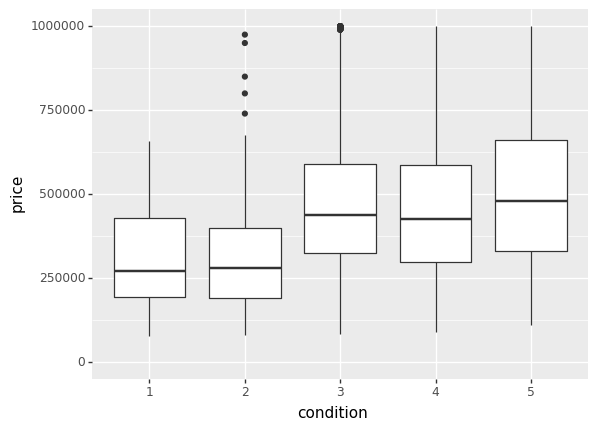

<ggplot: (326764180)>

In [8]:
### Create boxplots with ggplot functions (plotnine library)

### Set up the plot object with ggplot() and add the 
P1 = ggplot (df_condgrpr, aes (x = "condition", y = "price")) + \
    geom_boxplot() + \
        ylim((0, 1000000)) ### Add limits to the y axis to cut off the long tails for better conditions
ggsave (P1, "./plots/price_condition_boxplot.png", dpi = 150) ### Function to save as image

P1

/Users/gunnaroehmichen/neuefische/ds-eda-project-gunnar-oeh/.venv/lib/python3.9/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/gunnaroehmichen/neuefische/ds-eda-project-gunnar-oeh/.venv/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ./plots/price_grade_boxplot.png
/Users/gunnaroehmichen/neuefische/ds-eda-project-gunnar-oeh/.venv/lib/python3.9/site-packages/plotnine/layer.py:333: PlotnineWarning: stat_boxplot : Removed 11 rows containing non-finite values.
/Users/gunnaroehmichen/neuefische/ds-eda-project-gunnar-oeh/.venv/lib/python3.9/site-packages/plotnine/layer.py:333: PlotnineWarning: stat_boxplot : Removed 11 rows containing non-finite values.


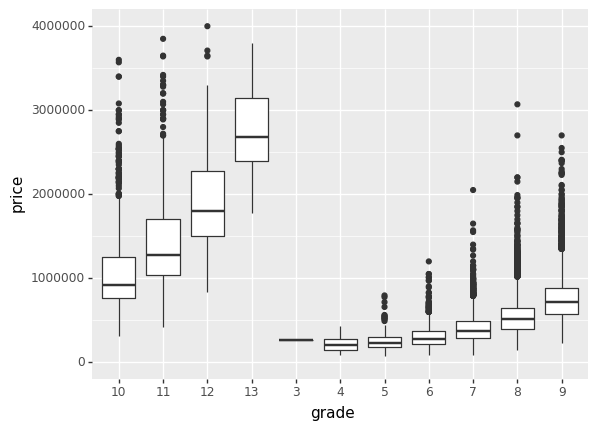

<ggplot: (326965815)>

In [10]:
### Second plot
P2 = ggplot (df_condgrpr, aes (x = "grade", y = "price")) + \
    geom_boxplot() + \
        ylim((0,4000000)) ### Add limits to the y axis to cut off the long tails for better grades
ggsave (P2, "./plots/price_grade_boxplot.png", dpi = 150)
P2

- Both variables show a great range with right-skewed data with a long tail. The tail with explainable outliers (expensive, luxurious houses) grows larger and ranges into the range of a price of several million dollars especially for higher graded houses
- The price is closely associated with grade. It could almost be described as a luxury variable.
- The condition is a better supplement to the price, as it can be seen mor of a descriptor of the need for renovation and might be more related to the safety and hygiene of the houses
- The width of the main range (25th - 75th percentile) is similar among condition labels, yet from condition 2 to 3 a slight jump occurs to distributions of higher prices

### Question 1: Takeaways

- Correlation graph as it is now not well suited - lowest correlations have the highest numbers
- The larger the living area, the higher the grade (0.72)
- The grade rises slightly with the area price
- The price per area rises only slightly with the condition
- The grade rises with the price per lot area
- The price rises with the grade
- The median price for houses in condition 1 and 2 seems to be 100000$ lower than 3-5. Therefore focus on those houses

### Question 2: Where might poor neighborhoods based on the housing data be located?

#### Methods:
- Compare percentage of houses with low price per sqm (<= perc(15)) between zip codes
- Plot the most promising locations

In [ ]:
### Meaningful zip-code and house data?

df_zip_count = df_hs.groupby("zipcode", as_index = False).count()[["zipcode", "id_house"]]
df_zip_count # 70 zipcodes
df_zip_count.describe().round(2) # with a mean of 308 houses each between 50 and 600 houses

In [ ]:
### Percentage of houses per zip-code below the price per area living 15 th percentile
cols_subset = cols + ["zipcode", "id_house"] # subset of columns for further investigation
### concat cols and the boolean information on the percentile

### Or cleaer differientiating by price?

In [ ]:
### Concatenate df_hs with only columns of interest and df_perc_15
new_cols = {}
for col in list(df_perc_15.columns):
    new_cols[col] = "under15_" + col

df_perc_15.rename(new_cols, axis = 1, inplace = True)

### df of interest with columns of interest and wether they are below their respt 15 perc
df_hs_intr = pd.concat([df_hs[cols_subset], df_perc_15], axis = 1)


In [ ]:
### Function to calculate the ratio of houses below the 15th perc for the corresponding column
### eg for column price: calculates for each zipcode, the ratio of house prices under the 15th percentile 
### of house prices from the whole county

def ratio_group(df, col_name, group_factor = "zipcode"):
    col_perc15 = "under15_" + col_name # name of colum with corresponding boolean <= perc 15
    df_gr = df.groupby([group_factor, col_perc15], as_index = False).count()[[group_factor, col_perc15, "id_house"]]
    df_gr.rename({"id_house":"n_houses"}, axis = 1, inplace = True)

# Calculates the ratio only for those zipcodes, where there are houses below the 15th percentile of the corresponding
# column
    def ratio_perc15(df_2):
        ind = df_2[col_perc15] == True
        new_col_rat = "ratio_" + col_perc15 # new name for ratio column
        df_2[new_col_rat] = df_2.n_houses[ind] / sum (df_2.n_houses)
        return df_2

    df_gr = df_gr.groupby(group_factor, as_index = False).apply(ratio_perc15)
    df_gr = df_gr[df_gr[col_perc15] == True]
    return df_gr.iloc[:,[0,3]]

### Apply to all columns of interest - create a list with a df for each column of interes
### (price, price per sqm, area living space and lot, condition, grade)
ratios_zip = []
for x in cols:
    ratios_zip.append(ratio_group(df_hs_intr, x))


### Combine dfs in list into one df
df_ratios = reduce (lambda df1, df2: df1.merge (df2, on = "zipcode", how = "outer"), ratios_zip)

### Compare info on the whole new df of ratios 
df_ratios.info()
### with length of dfs in the original list
for x in ratios_zip:
    print (len(x))

### df_ratios can be now used for searching for the right zipcode


In [ ]:
df_ratios_long = df_ratios.melt(id_vars = "zipcode")
df_ratios_long["zip_str"] = df_ratios_long.zipcode.astype("str")
df_ratios_long["variable"] = df_ratios_long["variable"].str.replace ("ratio_under15_", "")

P5 = ggplot(df_ratios_long, aes (x = "variable", y = "value")) + \
    geom_boxplot() + \
    coord_flip() + \
    labs(title = "Ratio of houses within lowest 15 perc. across Zipcodes", x = "", y = "ratio")
P5
ggsave (P5, "./plots/ratios_zipcodes.png", dpi = 150)



#### 2.1 Which ratios are best suited to identify the neighbourhoods in most need of funded development
- The ratio of houses of a zipcode with a price, a price per m^2 living or lot space within the lowest 15% of all king-county houses is better suited to identify especially poor neighborhoods
- Since most zipcodes have only a low percentage (median values) of those affordable houses and should therefore not predominantly be populated by lower income houshoulds
- The relative amount of houses within the lowest 15% of grades and condition per zipcode are different.
- The median among the zipcodes is ~ 60%. So it is very common for every neighboorhood, that more than half of its houses have received a very low grade or are in a bad condition

#### 2.2 Identify the few Zipcodes with the highest percentage of houses in the lower 15th percentile

- Order the df_ratios by variable: price_living_sqm
- Identify the 10 with highest ration

In [ ]:
### Order Dataframe ratios
df_ratios.sort_values(by = "ratio_under15_price_living_sqm", ascending = False, inplace = True)
df_ratios.reset_index(inplace = True, drop = True)

df_ratios = df_ratios.iloc[:,0:]

df_ratios.head(10)


In [ ]:
### Scatterplot: ratio_price_living ~ ratio_price, colour + size = condition
### Highlight a few zipcodes
P6 = ggplot(df_ratios, aes (x = "ratio_under15_price_living_sqm", y = "ratio_under15_price")) + \
    geom_point(aes (fill = "ratio_under15_condition", size = "ratio_under15_condition")) + \
        scale_fill_gradient(low = "#d4dbea", high = "#011d5b") + \
        labs (title = "Ratio of houses within lowest 15 perc. across Zipcodes",
        x = "Ratio: Price / m^2", y = "Ratio: Price", fill = "Ratio: Condition", size = "Ratio: Condition")

df_ratios["zip_str"] = df_ratios.zipcode.astype("str")

In [ ]:
### Plot the highlighted as endpoints
#df_ratios.zip_str[12:] = np.nan
# df_ratios.zip_str

P6 + geom_text(aes(label = "zip_str"), nudge_x = 0.05)

### The zipcodes [98022, 98092, 98012, 98031, 98002, 98032] do not fit the expectation of neighborhood
### with high percentage of houses in lowest 15 of price, price / sqm and especially condition
### Make them NA to not display the Value
ind = df_ratios.zipcode.isin([98022, 98092, 98042, 98031, 98002, 98032])
df_ratios.zip_str[ind] = np.nan

### Save the plot
P6 = P6 + geom_text(aes(label = "zip_str"), nudge_x = 0.05)
P6
ggsave(P6, "plots/scatterplot_ratio_zipcodes.png", dpi = 150)



#### 2.2 Scatterplot of the ratio of houses which are within the lowest 15 % for the respective parameter among zipcodes
- Ratio of Price / m^2 and overall Price within the lowest 15% of prices:
- Identified Neighborhoods where most houses have a relatively low price per area and price overall
- Size and color of dots: The larger and darker the higher the percentage of houses within the lowest 15% of the condition
- Choose neighboorhoods with a high percentage: Relatively many houses in a bad condition

- Identified Neighboorhoods with the highest percentage of low priced living space in a bad condition
-> Here Erin should invest to buy and renovate for the fund

In [ ]:
### Geoplot of those zipcodes
### extract zipcodes
### subset original df with locations
final_zips = df_ratios.zip_str.dropna().astype("int")


In [ ]:
### Dataframe of houses in the chosen zipcodes
df_zip_poor = df_hs[df_hs.zipcode.isin(final_zips)]
df_zip_poor.zipcode.unique() ### Worked
df_zip_poor.reset_index(inplace=True, drop= True)

### Groupby Zipcode and calculate mean for lon and lat for plotting
df_zip_sum = df_zip_poor[["zipcode", "lat", "long"]].groupby("zipcode", as_index = False).apply(lambda x: np.mean(x))

### Add Name
df_zip_sum["name"] = ["Auburn, WA", "Federal Way, WA", "Federal Way, WA", "Kent, WA", "Seattle, WA", "Seattle, WA"]
df_zip_sum.zipcode = df_zip_sum.zipcode.astype("int")

In [ ]:
### Scatter geo
P7 = px.scatter_mapbox(df_zip_sum,
        title = "Poorer Neighborhoods <br> with development potential in King County",
        lat="lat", lon="long",
        #hover_name="name",
        hover_data=["zipcode"],
        text = "name",
        zoom=10,  height=600)

P7.update_layout(
    title_x=0.5,
    title_y=0.95,
    mapbox={"style": "open-street-map"},
    margin={"l": 0, "r": 0, "b": 0, "t": 80}
)
P7.show()
P7.write_image(file = "./plots/scatter_map.png", width = 1200)
